In [30]:
#load the necessary modules
import pandas as pd
import numpy as np
import datetime, math
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import os
import seaborn as sns

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import svm, preprocessing
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, classification_report

from keras.models import Model
from keras.layers import Input, Dense, Dropout
from keras.utils import to_categorical

In [31]:
# loaded the csv file
df_sensor = pd.read_csv("./ten-datasets/sensor.csv", parse_dates=['timestamp'])
df_sensor.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [32]:
df_sensor.machine_status.unique()

array(['NORMAL', 'BROKEN', 'RECOVERING'], dtype=object)

In [33]:
# include the timestamp as one of the feature to train the model

def convert_datetime(x):
    return x.timestamp()

df_sensor['timestamp'] = df_sensor[['timestamp']].applymap(convert_datetime)

df_sensor = df_sensor.drop(['Unnamed: 0'], axis=1)
df_sensor.head()

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,1.522541e+09,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1.522541e+09,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,1.522541e+09,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,1.522541e+09,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,1.522541e+09,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [34]:
for val in df_sensor.columns[1:-1]:
    df_sensor[val] = df_sensor[val].fillna(df_sensor[val].mean())

In [35]:
class_name = ['BROKEN', 'RECOVERING', 'NORMAL']

In [36]:
df_sensor['machine_status'] = df_sensor['machine_status'].replace('BROKEN', 0)
df_sensor['machine_status'] = df_sensor['machine_status'].replace('RECOVERING', 1)
df_sensor['machine_status'] = df_sensor['machine_status'].replace('NORMAL', 2)

In [37]:
X = np.array(df_sensor.iloc[:,0:-1])
X = preprocessing.scale(X)
y = np.array(df_sensor['machine_status'])

In [38]:
# use K-Fold to split the dataset
#skf = StratifiedKFold(n_splits=2)
#skf.get_n_splits(X, y)

In [39]:
#for train_index, test_index in skf.split(X, y):
#    print('####')
#    print("TRAIN:", train_index, "TEST:", test_index)
#    train_index
#    X_train, X_test = X.loc[train_index], X.loc[test_index]
#    y_train, y_test = y.loc[train_index], y.loc[test_index]

In [109]:
# split the training and test dataset with test dataset size is 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [41]:
def model_fit_report(y_values_actual, y_values_predicted, labels, label_name):
       
        
    matrix = confusion_matrix(y_values_actual, y_values_predicted, labels)#labels=lb.classes_
    fig, ax = plt.subplots(figsize=(14, 12))
    sns.heatmap(matrix, annot=True, fmt='d', linewidths=.5, center=0)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.xticks(np.arange(len(labels))+0.5, labels)
    plt.ylabel('True label')
    plt.yticks(np.arange(len(labels))+0.5, labels)
    plt.show()

    print("Classification Report")
    print("")
    print (classification_report(y_values_actual, y_values_predicted))

# LogisticRegression

In [42]:
%%time

clf = LogisticRegression(solver='liblinear')
clf.fit(X_train, y_train)



Wall time: 22.6 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
accuracy = clf.score(X_train, y_train)
print('model training accuracy: %.4f' %(accuracy))

model training accuracy: 0.9980


In [44]:
accuracy = clf.score(X_test, y_test)
print('model test accuracy: %.4f' %(accuracy))


model test accuracy: 0.9979


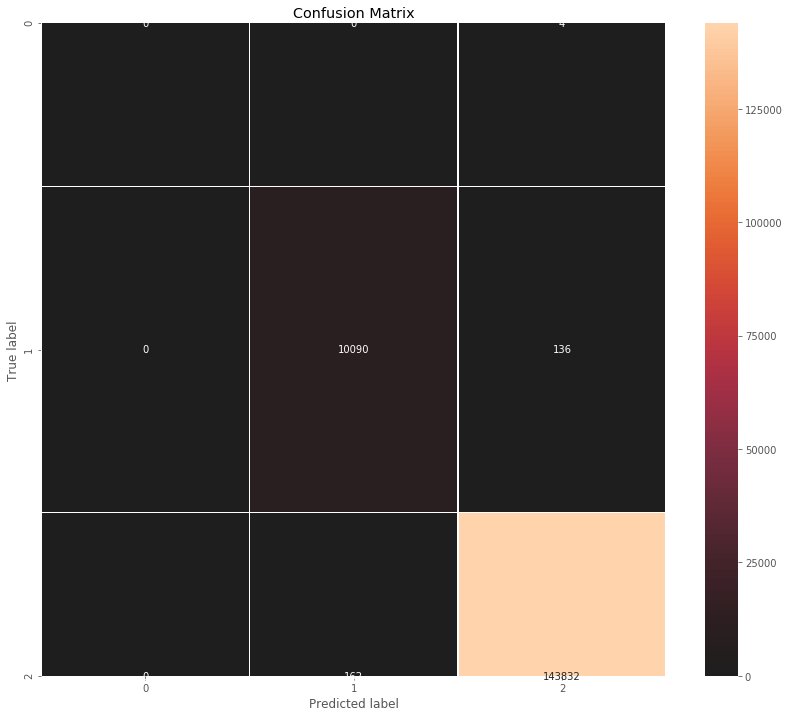

Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.98      0.99      0.99     10226
           2       1.00      1.00      1.00    143994

    accuracy                           1.00    154224
   macro avg       0.66      0.66      0.66    154224
weighted avg       1.00      1.00      1.00    154224



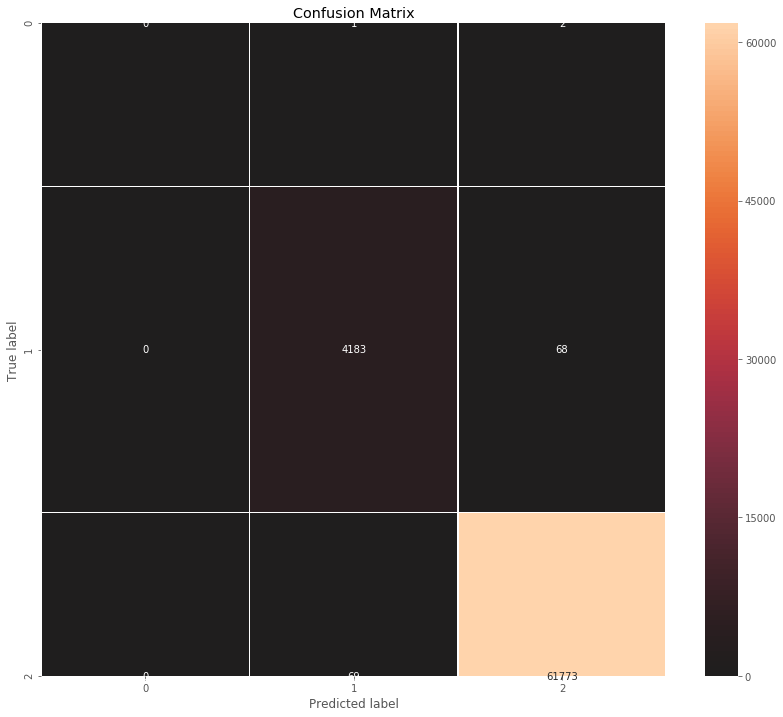

Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.98      0.98      0.98      4251
           2       1.00      1.00      1.00     61842

    accuracy                           1.00     66096
   macro avg       0.66      0.66      0.66     66096
weighted avg       1.00      1.00      1.00     66096



In [45]:

y_train_predict = clf.predict(X_train)
model_fit_report(y_train, y_train_predict, np.unique(y_train), class_name)

#get results for test dataset
y_test_predict = clf.predict(X_test)
model_fit_report(y_test, y_test_predict, np.unique(y_test), class_name)

# SVM

In [46]:
%%time

clf = svm.SVC()
clf.fit(X_train, y_train)



Wall time: 37.8 s


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [47]:
accuracy = clf.score(X_train, y_train)
print('model training accuracy: %.4f' %(accuracy))

model training accuracy: 0.9998


In [48]:
accuracy = clf.score(X_test, y_test)
print('model test accuracy: %.4f' %(accuracy))

model test accuracy: 0.9996


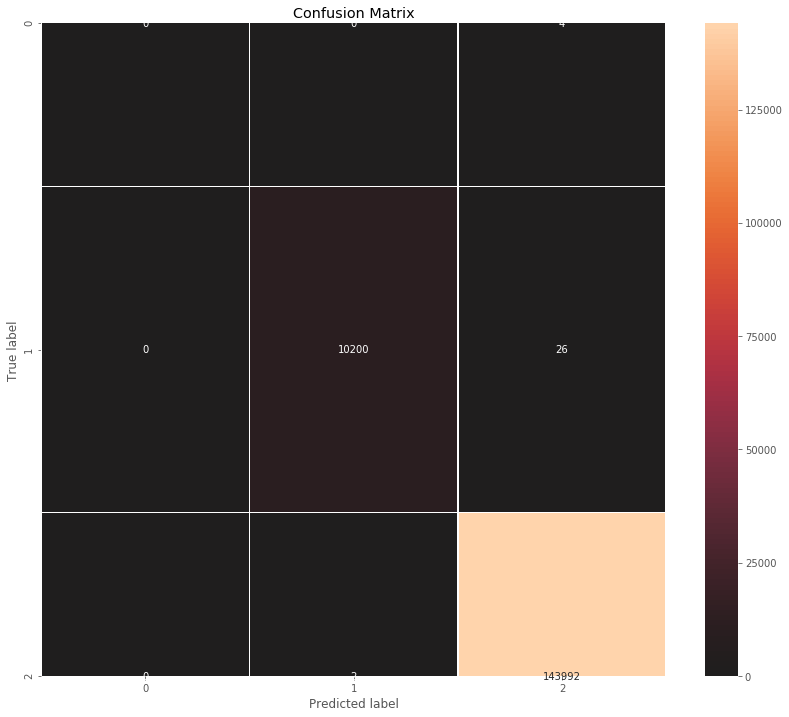

Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       1.00      1.00      1.00     10226
           2       1.00      1.00      1.00    143994

    accuracy                           1.00    154224
   macro avg       0.67      0.67      0.67    154224
weighted avg       1.00      1.00      1.00    154224



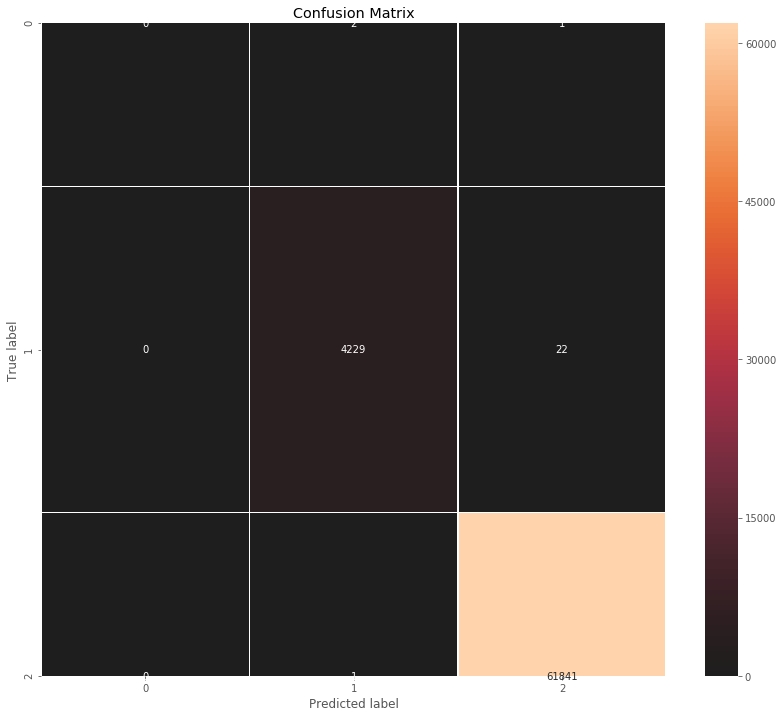

Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       1.00      0.99      1.00      4251
           2       1.00      1.00      1.00     61842

    accuracy                           1.00     66096
   macro avg       0.67      0.66      0.67     66096
weighted avg       1.00      1.00      1.00     66096



In [49]:
y_train_predict = clf.predict(X_train)
model_fit_report(y_train, y_train_predict, np.unique(y_train), class_name)

#get results for test dataset
y_test_predict = clf.predict(X_test)
model_fit_report(y_test, y_test_predict, np.unique(y_test), class_name)

# Random Forest

In [50]:
%%time

clf = RandomForestClassifier(criterion='gini', n_estimators=100)
clf.fit(X_train, y_train)



Wall time: 1min 52s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
accuracy = clf.score(X_train, y_train)
print('model training accuracy: %.4f' %(accuracy))

model training accuracy: 1.0000


In [52]:
accuracy = clf.score(X_test, y_test)
print('model test accuracy: %.4f' %(accuracy))

model test accuracy: 0.9998


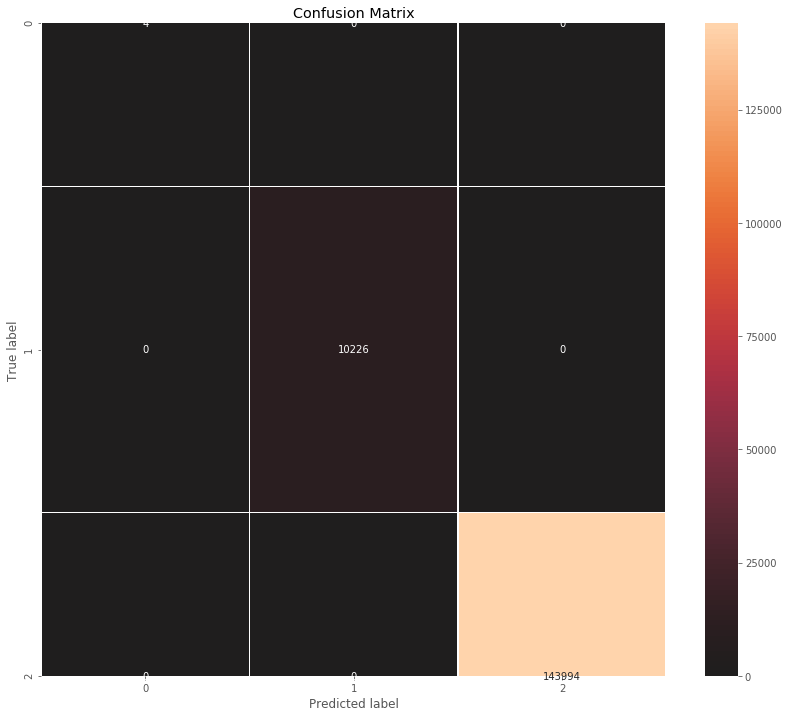

Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00     10226
           2       1.00      1.00      1.00    143994

    accuracy                           1.00    154224
   macro avg       1.00      1.00      1.00    154224
weighted avg       1.00      1.00      1.00    154224



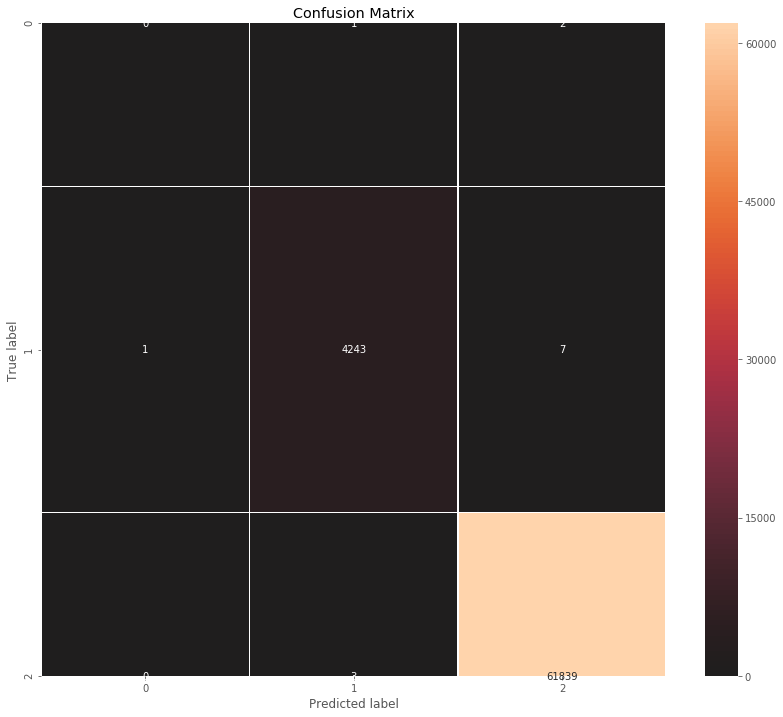

Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       1.00      1.00      1.00      4251
           2       1.00      1.00      1.00     61842

    accuracy                           1.00     66096
   macro avg       0.67      0.67      0.67     66096
weighted avg       1.00      1.00      1.00     66096



In [53]:
y_train_predict = clf.predict(X_train)
model_fit_report(y_train, y_train_predict, np.unique(y_train), class_name)

#get results for test dataset
y_test_predict = clf.predict(X_test)
model_fit_report(y_test, y_test_predict, np.unique(y_test), class_name)

# Deep Learning

In [117]:
X_train.shape

(154224, 52)

In [118]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
y_train_cat.shape

(154224, 3)

In [112]:
def plot_history(history):
    plt.figure()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')

    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


In [127]:
# 2 hidden layers, 100 units
inputs = Input(shape=X_train.shape[1:])
hidden = Dense(100, activation='relu')(inputs)
Dropout(0.25)
hidden = Dense(100, activation='relu')(hidden)
Dropout(0.25)
preds = Dense(3,activation='softmax')(hidden)

model = Model(inputs=inputs,outputs=preds)


In [128]:
model.compile(optimizer='sgd' ,loss='mse',metrics=['accuracy'])
#model.compile(optimizer='adam',loss ='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_train, y_train_cat, batch_size=128, epochs=10, validation_data=(X_test, y_test_cat))

Train on 154224 samples, validate on 66096 samples
Epoch 1/10
154224/154224 [==============================] - 3s 21us/step - loss: 0.0302 - accuracy: 0.9700 - val_loss: 0.0076 - val_accuracy: 0.9891
Epoch 2/10
154224/154224 [==============================] - 3s 20us/step - loss: 0.0063 - accuracy: 0.9901 - val_loss: 0.0055 - val_accuracy: 0.9917
Epoch 3/10
154224/154224 [==============================] - 3s 20us/step - loss: 0.0050 - accuracy: 0.9923 - val_loss: 0.0046 - val_accuracy: 0.9926
Epoch 4/10
154224/154224 [==============================] - 3s 21us/step - loss: 0.0044 - accuracy: 0.9930 - val_loss: 0.0042 - val_accuracy: 0.9930
Epoch 5/10
154224/154224 [==============================] - 3s 19us/step - loss: 0.0040 - accuracy: 0.9934 - val_loss: 0.0038 - val_accuracy: 0.9936
Epoch 6/10
154224/154224 [==============================] - 3s 21us/step - loss: 0.0037 - accuracy: 0.9939 - val_loss: 0.0036 - val_accuracy: 0.9940
Epoch 7/10
154224/154224 [=============================

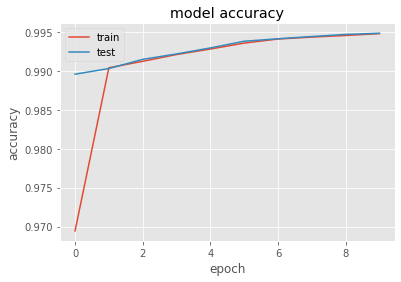

In [121]:
plot_history(history)

In [129]:
# 2 hidden layers, 100 units
inputs = Input(shape=X_train.shape[1:])
hidden = Dense(100, activation='relu')(inputs)
Dropout(0.25)
hidden = Dense(100, activation='relu')(hidden)
Dropout(0.25)
preds = Dense(3,activation='softmax')(hidden)

model = Model(inputs=inputs,outputs=preds)

In [130]:
#model.compile(optimizer='sgd' ,loss='mse',metrics=['accuracy'])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

Train on 154224 samples, validate on 66096 samples
Epoch 1/10
154224/154224 [==============================] - 3s 22us/step - loss: 0.0157 - accuracy: 0.9959 - val_loss: 0.0035 - val_accuracy: 0.9988
Epoch 2/10
154224/154224 [==============================] - 4s 23us/step - loss: 0.0029 - accuracy: 0.9991 - val_loss: 0.0022 - val_accuracy: 0.9995
Epoch 3/10
154224/154224 [==============================] - 3s 22us/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.0029 - val_accuracy: 0.9991
Epoch 4/10
154224/154224 [==============================] - 3s 22us/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.0056 - val_accuracy: 0.9983
Epoch 5/10
154224/154224 [==============================] - 3s 21us/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0026 - val_accuracy: 0.9994
Epoch 6/10
154224/154224 [==============================] - 4s 23us/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.0021 - val_accuracy: 0.9997
Epoch 7/10
154224/154224 [=============================

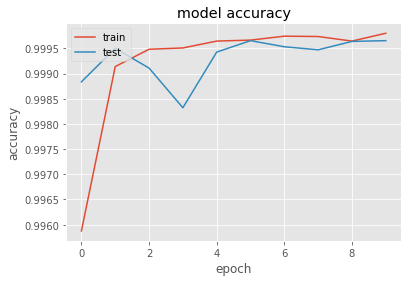

In [131]:
plot_history(history)

In [79]:
# 2 hidden layers, 200 units
inputs = Input(shape=[52,])
hidden = Dense(200, activation='relu')(inputs)
Dropout(0.25)
hidden = Dense(200, activation='relu')(hidden)
Dropout(0.25)
preds = Dense(y_train_cat.shape[1],activation='softmax')(hidden)

model = Model(inputs=inputs,outputs=preds)

In [80]:
model.compile(optimizer='sgd' ,loss='mse',metrics=['accuracy'])
#model.compile(optimizer='adam',loss ='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_train, y_train_cat, batch_size=128, epochs=10, validation_data=(X_test, y_test_cat))

Train on 154224 samples, validate on 66096 samples
Epoch 1/10
154224/154224 [==============================] - 4s 24us/step - loss: 0.0256 - accuracy: 0.9725 - val_loss: 0.0075 - val_accuracy: 0.9893
Epoch 2/10
154224/154224 [==============================] - 4s 23us/step - loss: 0.0063 - accuracy: 0.9901 - val_loss: 0.0054 - val_accuracy: 0.9914
Epoch 3/10
154224/154224 [==============================] - 4s 24us/step - loss: 0.0049 - accuracy: 0.9921 - val_loss: 0.0043 - val_accuracy: 0.9933
Epoch 4/10
154224/154224 [==============================] - 3s 22us/step - loss: 0.0040 - accuracy: 0.9938 - val_loss: 0.0035 - val_accuracy: 0.9941
Epoch 5/10
154224/154224 [==============================] - 3s 22us/step - loss: 0.0031 - accuracy: 0.9949 - val_loss: 0.0029 - val_accuracy: 0.9952
Epoch 6/10
154224/154224 [==============================] - 4s 23us/step - loss: 0.0027 - accuracy: 0.9956 - val_loss: 0.0025 - val_accuracy: 0.9958
Epoch 7/10
154224/154224 [=============================

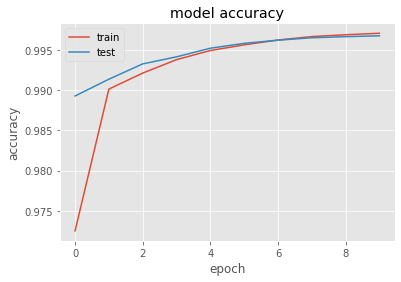

In [81]:
plot_history(history)

In [89]:
# 2 hidden layers, 300 units
inputs = Input(shape=[52,])
hidden = Dense(300, activation='relu')(inputs)
Dropout(0.25)
hidden = Dense(300, activation='relu')(hidden)
Dropout(0.25)
preds = Dense(y_train_cat.shape[1],activation='softmax')(hidden)

model = Model(inputs=inputs,outputs=preds)

In [90]:
model.compile(optimizer='sgd' ,loss='mse',metrics=['accuracy'])
history = model.fit(X_train, y_train_cat, batch_size=128, epochs=10, validation_data=(X_test, y_test_cat))

Train on 154224 samples, validate on 66096 samples
Epoch 1/10
154224/154224 [==============================] - 5s 31us/step - loss: 0.0266 - accuracy: 0.9770 - val_loss: 0.0074 - val_accuracy: 0.9893
Epoch 2/10
154224/154224 [==============================] - 5s 32us/step - loss: 0.0061 - accuracy: 0.9907 - val_loss: 0.0051 - val_accuracy: 0.9918
Epoch 3/10
154224/154224 [==============================] - 5s 32us/step - loss: 0.0046 - accuracy: 0.9929 - val_loss: 0.0041 - val_accuracy: 0.9933
Epoch 4/10
154224/154224 [==============================] - 5s 30us/step - loss: 0.0039 - accuracy: 0.9939 - val_loss: 0.0035 - val_accuracy: 0.9942
Epoch 5/10
154224/154224 [==============================] - 5s 31us/step - loss: 0.0034 - accuracy: 0.9943 - val_loss: 0.0031 - val_accuracy: 0.9945
Epoch 6/10
154224/154224 [==============================] - 5s 31us/step - loss: 0.0030 - accuracy: 0.9949 - val_loss: 0.0029 - val_accuracy: 0.9952
Epoch 7/10
154224/154224 [=============================

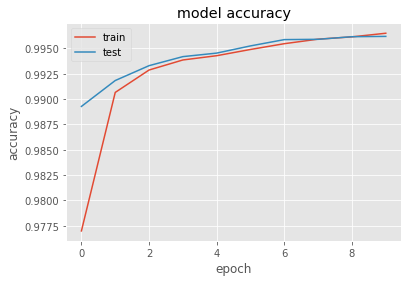

In [91]:
plot_history(history)

In [82]:
# 3 hidden layers, 100 units
inputs = Input(shape=[52,])
hidden = Dense(100, activation='relu')(inputs)
Dropout(0.25)
hidden = Dense(100, activation='relu')(hidden)
Dropout(0.25)
hidden = Dense(100, activation='relu')(hidden)
Dropout(0.25)
preds = Dense(y_train_cat.shape[1],activation='softmax')(hidden)

model = Model(inputs=inputs,outputs=preds)

In [83]:
model.compile(optimizer='sgd' ,loss='mse',metrics=['accuracy'])
history = model.fit(X_train, y_train_cat, batch_size=128, epochs=10, validation_data=(X_test, y_test_cat))

Train on 154224 samples, validate on 66096 samples
Epoch 1/10
154224/154224 [==============================] - 4s 25us/step - loss: 0.0276 - accuracy: 0.9746 - val_loss: 0.0070 - val_accuracy: 0.9905
Epoch 2/10
154224/154224 [==============================] - 4s 25us/step - loss: 0.0060 - accuracy: 0.9912 - val_loss: 0.0051 - val_accuracy: 0.9918
Epoch 3/10
154224/154224 [==============================] - 4s 24us/step - loss: 0.0047 - accuracy: 0.9926 - val_loss: 0.0043 - val_accuracy: 0.9931
Epoch 4/10
154224/154224 [==============================] - 3s 23us/step - loss: 0.0039 - accuracy: 0.9939 - val_loss: 0.0035 - val_accuracy: 0.9943
Epoch 5/10
154224/154224 [==============================] - 4s 23us/step - loss: 0.0033 - accuracy: 0.9949 - val_loss: 0.0030 - val_accuracy: 0.9950
Epoch 6/10
154224/154224 [==============================] - 4s 24us/step - loss: 0.0029 - accuracy: 0.9953 - val_loss: 0.0027 - val_accuracy: 0.9954
Epoch 7/10
154224/154224 [=============================

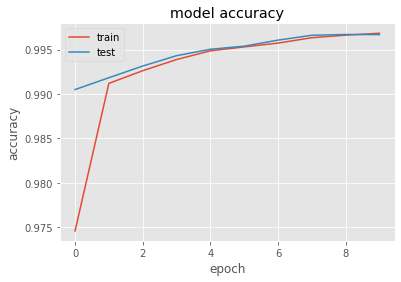

In [84]:
plot_history(history)

In [86]:
# 4 hidden layers, 100 units
inputs = Input(shape=[52,])
hidden = Dense(100, activation='relu')(inputs)
Dropout(0.25)
hidden = Dense(100, activation='relu')(hidden)
Dropout(0.25)
hidden = Dense(100, activation='relu')(hidden)
Dropout(0.25)
hidden = Dense(100, activation='relu')(hidden)
Dropout(0.25)
preds = Dense(y_train_cat.shape[1],activation='softmax')(hidden)

model = Model(inputs=inputs,outputs=preds)

In [87]:
model.compile(optimizer='sgd' ,loss='mse',metrics=['accuracy'])
history = model.fit(X_train, y_train_cat, batch_size=128, epochs=10, validation_data=(X_test, y_test_cat))

Train on 154224 samples, validate on 66096 samples
Epoch 1/10
154224/154224 [==============================] - 4s 27us/step - loss: 0.0328 - accuracy: 0.9587 - val_loss: 0.0069 - val_accuracy: 0.9899
Epoch 2/10
154224/154224 [==============================] - 4s 26us/step - loss: 0.0060 - accuracy: 0.9905 - val_loss: 0.0053 - val_accuracy: 0.9907
Epoch 3/10
154224/154224 [==============================] - 4s 25us/step - loss: 0.0049 - accuracy: 0.9914 - val_loss: 0.0045 - val_accuracy: 0.9923
Epoch 4/10
154224/154224 [==============================] - 4s 26us/step - loss: 0.0043 - accuracy: 0.9928 - val_loss: 0.0040 - val_accuracy: 0.9931
Epoch 5/10
154224/154224 [==============================] - 4s 27us/step - loss: 0.0038 - accuracy: 0.9936 - val_loss: 0.0036 - val_accuracy: 0.9934
Epoch 6/10
154224/154224 [==============================] - 4s 26us/step - loss: 0.0033 - accuracy: 0.9941 - val_loss: 0.0032 - val_accuracy: 0.9941
Epoch 7/10
154224/154224 [=============================

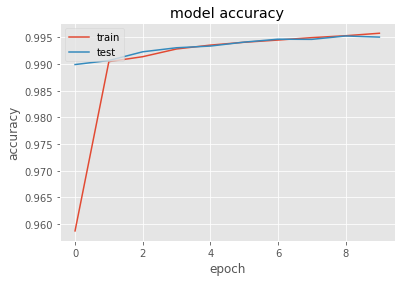

In [88]:
plot_history(history)

# CNN

In [92]:
X_train = X_train[:, :, np.newaxis]
X_train.shape

(154224, 52, 1)

In [93]:
X_test = X_test[:, :, np.newaxis]
X_test.shape

(66096, 52, 1)

In [94]:
from keras.models import Sequential
from keras.layers import Input, Conv1D, Conv2D, BatchNormalization, Activation, MaxPooling1D, MaxPooling2D, Dropout, Flatten, Dense

In [97]:
#bn_axis = 3

model = Sequential()

model.add(Conv1D(32, 6, activation='relu', input_shape=X_train.shape[1:], strides=1))
model.add(Conv1D(32, 6))
model.add(MaxPooling1D(pool_size=3))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train_cat.shape[1], activation='softmax'))
model.compile(optimizer='sgd' ,loss='mse',metrics=['accuracy'])
         
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 47, 32)            224       
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 42, 32)            6176      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 14, 32)            0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 14, 32)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 448)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 100)               44900     
_________________________________________________________________
dropout_37 (Dropout)         (None, 100)              

In [98]:
history = model.fit(X_train, y_train_cat, batch_size=128, epochs=10, validation_data=(X_test, y_test_cat))

Train on 154224 samples, validate on 66096 samples
Epoch 1/10
154224/154224 [==============================] - 15s 100us/step - loss: 0.0339 - accuracy: 0.9498 - val_loss: 0.0056 - val_accuracy: 0.9901
Epoch 2/10
154224/154224 [==============================] - 15s 98us/step - loss: 0.0083 - accuracy: 0.9868 - val_loss: 0.0051 - val_accuracy: 0.9905
Epoch 3/10
154224/154224 [==============================] - 15s 99us/step - loss: 0.0069 - accuracy: 0.9884 - val_loss: 0.0050 - val_accuracy: 0.9907
Epoch 4/10
154224/154224 [==============================] - 15s 99us/step - loss: 0.0063 - accuracy: 0.9891 - val_loss: 0.0047 - val_accuracy: 0.9911
Epoch 5/10
154224/154224 [==============================] - 15s 98us/step - loss: 0.0059 - accuracy: 0.9896 - val_loss: 0.0045 - val_accuracy: 0.9916
Epoch 6/10
154224/154224 [==============================] - 15s 99us/step - loss: 0.0054 - accuracy: 0.9903 - val_loss: 0.0041 - val_accuracy: 0.9921
Epoch 7/10
154224/154224 [======================

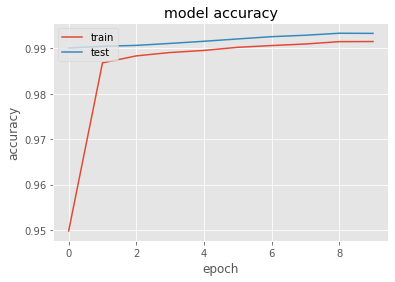

In [99]:
plot_history(history)

In [100]:
model = Sequential()

model.add(Conv1D(32, 6, activation='relu', input_shape=X_train.shape[1:], strides=1))
model.add(Conv1D(32, 6))
model.add(MaxPooling1D(pool_size=3))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train_cat.shape[1], activation='softmax'))
model.compile(optimizer='sgd' ,loss='mse',metrics=['accuracy'])
         
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 47, 32)            224       
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 42, 32)            6176      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 14, 32)            0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 14, 32)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 448)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 200)               89800     
_________________________________________________________________
dropout_39 (Dropout)         (None, 200)              

In [101]:
history = model.fit(X_train, y_train_cat, batch_size=128, epochs=10, validation_data=(X_test, y_test_cat))

Train on 154224 samples, validate on 66096 samples
Epoch 1/10
154224/154224 [==============================] - 18s 116us/step - loss: 0.0445 - accuracy: 0.9365 - val_loss: 0.0064 - val_accuracy: 0.9896
Epoch 2/10
154224/154224 [==============================] - 18s 117us/step - loss: 0.0098 - accuracy: 0.9841 - val_loss: 0.0062 - val_accuracy: 0.9888
Epoch 3/10
154224/154224 [==============================] - 18s 114us/step - loss: 0.0077 - accuracy: 0.9870 - val_loss: 0.0062 - val_accuracy: 0.9889
Epoch 4/10
154224/154224 [==============================] - 17s 112us/step - loss: 0.0071 - accuracy: 0.9878 - val_loss: 0.0061 - val_accuracy: 0.9892
Epoch 5/10
154224/154224 [==============================] - 17s 111us/step - loss: 0.0067 - accuracy: 0.9882 - val_loss: 0.0058 - val_accuracy: 0.9898
Epoch 6/10
154224/154224 [==============================] - 17s 111us/step - loss: 0.0064 - accuracy: 0.9887 - val_loss: 0.0055 - val_accuracy: 0.9903
Epoch 7/10
154224/154224 [=================

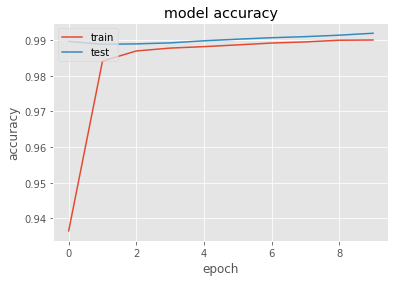

In [102]:
plot_history(history)

In [103]:
model = Sequential()

model.add(Conv1D(64, 6, activation='relu', input_shape=X_train.shape[1:], strides=1))
model.add(Conv1D(64, 6))
model.add(MaxPooling1D(pool_size=3))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train_cat.shape[1], activation='softmax'))
model.compile(optimizer='sgd' ,loss='mse',metrics=['accuracy'])
         
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 47, 64)            448       
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 42, 64)            24640     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 14, 64)            0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 14, 64)            0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 896)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 100)               89700     
_________________________________________________________________
dropout_42 (Dropout)         (None, 100)              

In [104]:
history = model.fit(X_train, y_train_cat, batch_size=128, epochs=10, validation_data=(X_test, y_test_cat))

Train on 154224 samples, validate on 66096 samples
Epoch 1/10
154224/154224 [==============================] - 31s 199us/step - loss: 0.0317 - accuracy: 0.9590 - val_loss: 0.0055 - val_accuracy: 0.9903
Epoch 2/10
154224/154224 [==============================] - 31s 201us/step - loss: 0.0073 - accuracy: 0.9884 - val_loss: 0.0052 - val_accuracy: 0.9905
Epoch 3/10
154224/154224 [==============================] - 31s 201us/step - loss: 0.0064 - accuracy: 0.9891 - val_loss: 0.0049 - val_accuracy: 0.9908
Epoch 4/10
154224/154224 [==============================] - 31s 200us/step - loss: 0.0057 - accuracy: 0.9899 - val_loss: 0.0046 - val_accuracy: 0.9912
Epoch 5/10
154224/154224 [==============================] - 31s 201us/step - loss: 0.0052 - accuracy: 0.9907 - val_loss: 0.0041 - val_accuracy: 0.9918
Epoch 6/10
154224/154224 [==============================] - 32s 210us/step - loss: 0.0050 - accuracy: 0.9911 - val_loss: 0.0037 - val_accuracy: 0.9927
Epoch 7/10
154224/154224 [=================

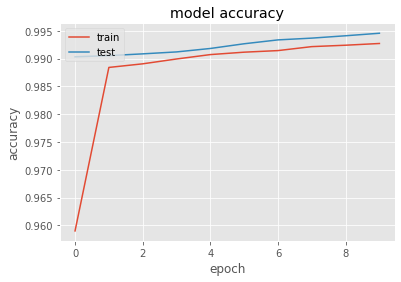

In [105]:
plot_history(history)